# Tarefa 07 de Álgebra Linear Computacional

Atividade sobre Mínimos Quadrados.

* **Aluna:** Bárbara Neves
* **Matrícula:** 507526

### Descrição

Considere uma matriz $A_{m \times n}$ com $m > n$  e um vetor $b$ pertencente ao $\mathbb{R}^{m}$. Encontre uma solução aproximada $x^*$  para o problema $Ax = b$ que minimize a norma quadrada do vetor $Ax^* - b$.

Aplique este tipo de solução ao **problema de regressão linear**.

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)

# Problema dos Mínimos Quadrados

Quando o sistema algébrico $Ax = b$ não possui matrizes quadradas e é inconsistente, então não há vetor $x$ tal que $Ax$ e $b$ sejam iguais. 

Podemos escolher um vetor $x$ tal que $Ax$ e $b$ sejam tão próximos quanto possível. Para fazer isso, definimos o vetor de erro $e = Ax - b$ e escolhemos o $x$ que minimiza $||e||$. 

Esta escolha de $x$ é conhecida como a **Solução de Mínimos Quadrados** para o sistema $Ax = b$, com o símbolo $\hat{x}$. 

\\

---

\\

Seja $A$ uma matriz $m \times n$ e $b$ um vetor pertencente ao $\mathbb{R}^{m}$:

1. $Ax = b$ tem uma solução única de mínimos quadrados.
2. As colunas de $A$ são linearmente independentes.
3. $A^TA$ é inversível.

<center>
<img width="550" src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/mahima-least-square-2-1605606779.png" />
</center>

Neste caso, a solução de mínimos quadrados é

\begin{gather*} 
\hat{x} = (A^TA)^{-1}A^Tb
\end{gather*}

\\

> Observe que $(A^TA)^{-1}A^T$ é a pseudoinversa de $A$ e só existe quando $m > n$, e quando $A$ tem colunas linearmente independentes.






## O que iremos resolver?

Iremos resolver alguns *best-fit problems* usando o método dos mínimos quadrados para modelagem de dados.

Alguns dos problemas escolhidos foram selecionados deste [*link*](https://www.analyzemath.com/statistics/linear_regression.html). 



### Problema 1

Considere os valores correspondentes da tabela abaixo:

$x_1$   | $y_1$ 
------- | ------
0       | 2 
1       | 3 
2       | 5 
3       | 4 
4       | 6 


In [2]:
x_1 = np.array([
  0,
  1, 
  2,
  3,
  4
], dtype='float32')

y_1 = np.array([
  2,
  3,
  5,
  4,
  6             
])

### Problema 2

As vendas de uma empresa (em milhões de dólares) para cada ano são mostradas na tabela abaixo:

$x_2$ (ano) | $y_2$ (vendas)
------------|---------------
2005        | 12 
2006        | 19 
2007        | 29
2008        | 37 
2009        | 45 


In [3]:
x_2 = np.array([
  2005,
  2006, 
  2007,
  2008,
  2009
], dtype='float32')

y_2 = np.array([
  12,
  19,
  29,
  37,
  45             
])

### Problema 3

Valores gerados aleatoriamente.

In [4]:
x_3 = np.linspace(0, 1, 101)

y_3 = 1 + x_3 + x_3 * np.random.random(len(x_3))
# y_3 = y_3[:, np.newaxis]

# Método *Least Squares Regression*

In [5]:
def is_dependent(A):
  '''
  Verifica se uma matriz possui colunas linearmente dependentes
  ----------
  Usa a função linalg.eig do NumPy que calcula os autovalores de uma matriz quadrada
  '''
  try:
    lambdas, V =  np.linalg.eig(A.T)
    return len(V[lambdas == 0,:][0]) > 0
  except:
    return False

def lstsq(x, y):
  A = np.vstack([x, np.ones(len(x))]).T # Coluna extra de 1's
  m, n = A.shape 

  # Apesar de não ser necessário, os dois if's a seguir tratam as exceções do formato e conteúdo da matriz A
  if m < n:
    raise ValueError('A matriz deve conter o número de linhas maior que o de colunas.\nm = {} e n = {}')

  if is_dependent(A):
    raise ValueError('A matriz possui colunas linearmente dependentes.')
  
  pinv = np.linalg.pinv(A) #Pseudoinversa de A
  alpha = pinv.dot(y)
  
  return alpha 

def best_fit_line(x, y, alpha):
  '''
  Desenha uma linha através de um gráfico de dispersão de dados que melhor expressa a relação entre esses pontos
  '''
  data = pd.DataFrame([x, y]).T
  line_data = pd.DataFrame([x, alpha[0]*x + alpha[1]]).T
  cmap = sns.cubehelix_palette(as_cmap=True)
  
  plt.figure(figsize=(8, 6))
  sns.color_palette("rocket", as_cmap=True)

  sns.scatterplot(data=data, x=0, y=1, hue=1, size=1, sizes=(20, 200), palette='icefire')
  sns.lineplot(data=line_data, x=0, y=1, label='Best-fit', color='firebrick')
  
  plt.xlabel('x')
  plt.ylabel('y')
  
  plt.legend()
  plt.show()

## Solução do Problema 1

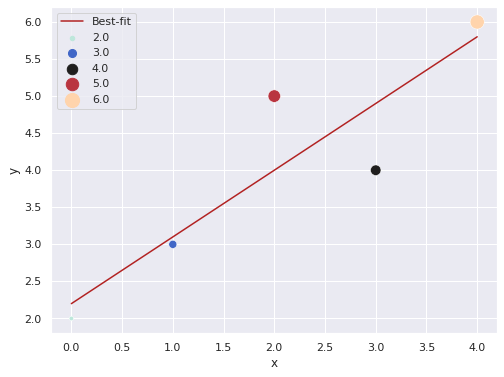

In [6]:
alpha_1 = lstsq(x_1, y_1)

best_fit_line(x_1, y_1, alpha_1)

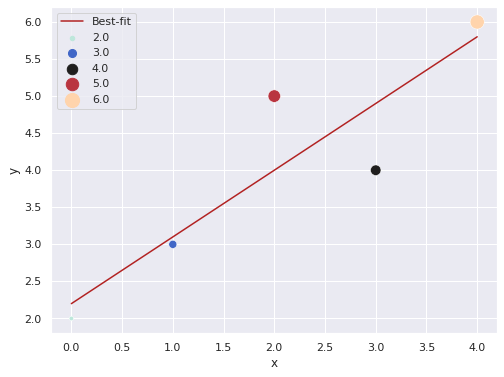

In [7]:
# Segue a comparação com o método lstsq(a, b) do NumPy
A_1 = np.vstack([x_1, np.ones(len(x_1))]).T
alpha_np_1 = np.linalg.lstsq(A_1, y_1, rcond=None)[0]

best_fit_line(x_1, y_1, alpha_np_1)

## Solução do Problema 2

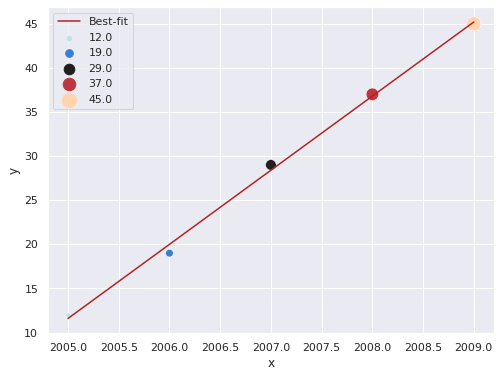

In [8]:
alpha_2 = lstsq(x_2, y_2)

best_fit_line(x_2, y_2, alpha_2)

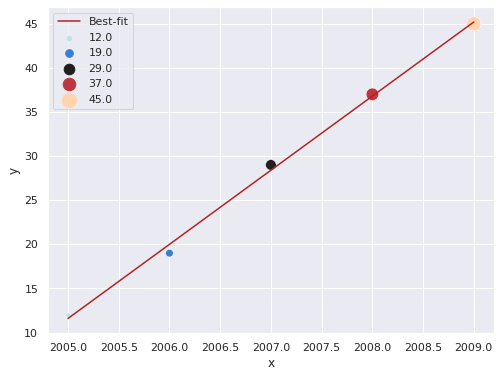

In [9]:
# Segue a comparação com o método lstsq(a, b) do NumPy
A_2 = np.vstack([x_2, np.ones(len(x_2))]).T
alpha_np_2 = np.linalg.lstsq(A_2, y_2, rcond=None)[0]

best_fit_line(x_2, y_2, alpha_np_2)

## Solução do Problema 3

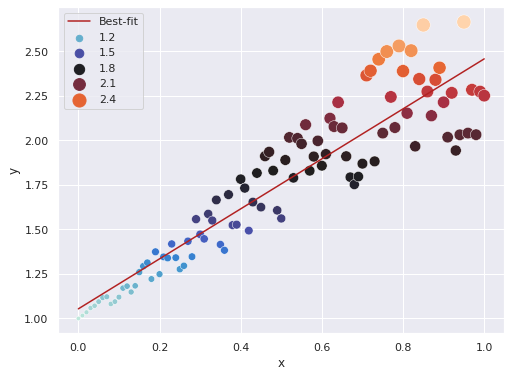

In [10]:
alpha_3 = lstsq(x_3, y_3)

best_fit_line(x_3, y_3, alpha_3)

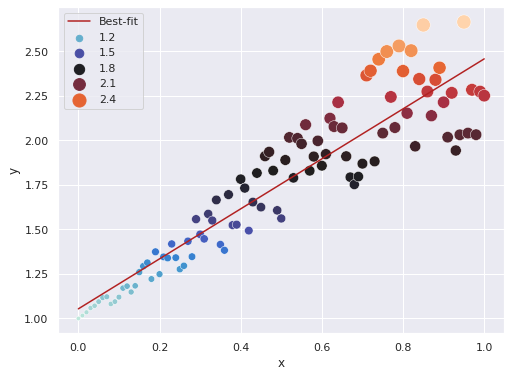

In [11]:
# Segue a comparação com o método lstsq(a, b) do NumPy
A_3 = np.vstack([x_3, np.ones(len(x_3))]).T
alpha_np_3 = np.linalg.lstsq(A_3, y_3, rcond=None)[0]

best_fit_line(x_3, y_3, alpha_np_3)

<!--- **Info aula:** método usado quando o sistema algébrico não possui matrizes quadradas; quando os vetores possuem espaços de tamanhos diferentes (x e y?); possui (no máximo) uma solução aproximada; usado em Regressão Linear e em ajustes de curvas polinomiais

**Pesquisar** pesquisar sobre o que foi explanado acima para introdução do método --->